# CSST 106
**Verdad, Jane Benneth Dione**

**BSCS-4B**

**September 09, 2024**

**Exercise 1**


**1. Install OpenCV**

In [ ]:
!pip install opencv-python-headless

**2. Import Libraries**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_image(img, title="Image"):
  plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.axis('off')
  plt.show()

def display_images(img1, img2, title1="Image 1", title2="Image 2 "):
  plt.subplot(1,2,1)
  plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))
  plt.title(title1)
  plt.axis('off')

  plt.subplot(1,2,2)
  plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
  plt.title(title2)
  plt.axis('off')

  plt.show()

**3. Load Image**

Saving Verdad.jpg to Verdad.jpg


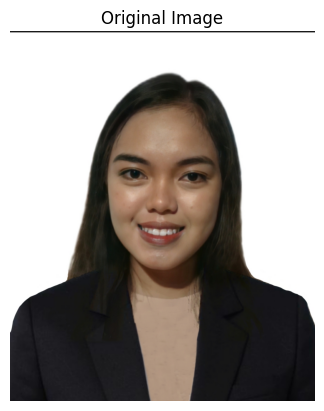

In [187]:
from google.colab import files
from io import BytesIO
from PIL import Image

uploaded = files.upload()

image_path = next(iter(uploaded))
image = Image.open(BytesIO(uploaded[image_path]))
image = cv2.cvtColor(np.array(image),cv2.COLOR_BGR2RGB)

display_image(image, "Original Image")

**Exercise 1: Scaling and Rotation**

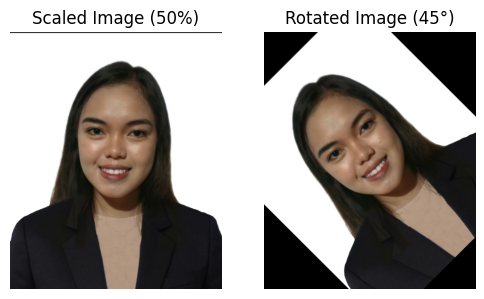

In [ ]:
def scale_image(image, scale_factor):
  height, width = image.shape[:2]
  scale_image = cv2.resize(image, (int(width * scale_factor), int(height * scale_factor)), interpolation=cv2.INTER_LINEAR)
  return scale_image

scaled_image = scale_image(image, 0.5)

def rotate_image(image, angle):
  height, width = image.shape[:2]
  center = (width // 2, height //2)
  matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
  rotated_image = cv2.warpAffine (image, matrix, (width, height))
  return rotated_image

rotated_image = rotate_image(image, 45)

# Display images side by side
plt.figure(figsize=(6, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(scaled_image, cv2.COLOR_BGR2RGB))
plt.title("Scaled Image (50%)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.title("Rotated Image (45°)")
plt.axis('off')

plt.show()

**Exercise 2: Blurring Techniques and Side by Side Comparison**

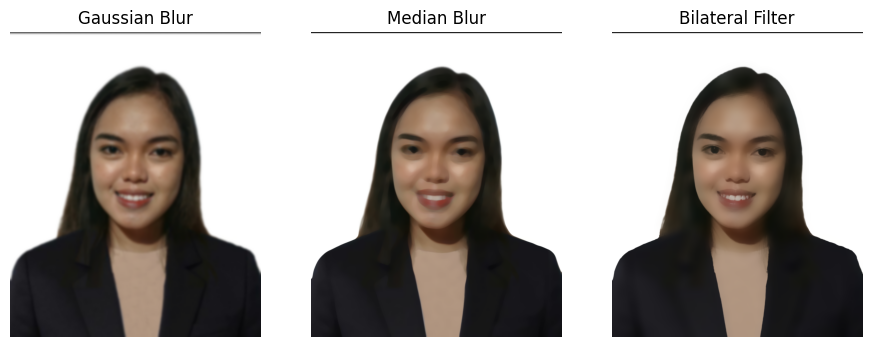

In [ ]:
gaussian_blur = cv2.GaussianBlur(image, (25,25),0)
median_blur = cv2.medianBlur(image, 25)
bilateral_filter = cv2.bilateralFilter(image, 50, 100, 150)

# Display the side by side results for comparison
plt.figure(figsize=(11, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2RGB))
plt.title("Gaussian Blur")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(median_blur, cv2.COLOR_BGR2RGB))
plt.title("Median Blur")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(bilateral_filter, cv2.COLOR_BGR2RGB))
plt.title("Bilateral Filter")
plt.axis('off')

plt.show()

**Exercise 3: Edge Detection using Canny**

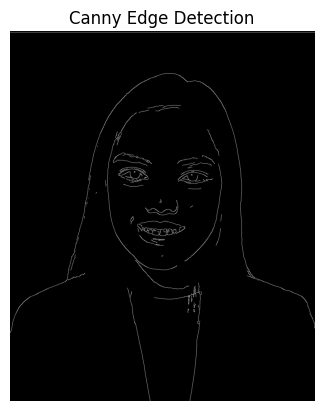

In [ ]:
edges = cv2.Canny(image, 50, 100)
display_image(edges, "Canny Edge Detection")

**September 16, 2024**

**Other Blurring Techniques and Side by Side Comparison**

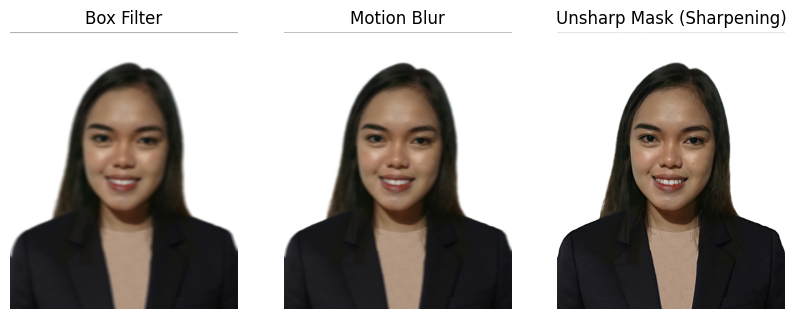

In [ ]:
#BOX FILTER
def box_blur(img):
  box = cv2.boxFilter(img, -1, (20, 10))
  return box
# Apply Box filter to the uploaded image
box_blurred = box_blur(image)


#MOTION BLUR
def motion_blur(img):
  # Create motion blur kernel (size 15x15)
  kernel_size = 15
  kernel = np.zeros((kernel_size, kernel_size))
  kernel[int((kernel_size - 2) / 2), :] = np.ones(kernel_size)
  kernel = kernel / kernel_size
  # Apply motion blur
  motion_blurred = cv2.filter2D(img, -2, kernel)
  return motion_blurred
# Apply Motion blur to the uploaded image
motion_blurred = motion_blur(image)


#UNSHARP MASKING (SHARPENING)
def unsharp_mask(img):
  # Create a Gaussian blur version of the image
  blurred = cv2.GaussianBlur(img, (15, 15), 10.0)
  # Sharpen by adding the difference between the original and the blurred image
  sharpened = cv2.addWeighted(img, 1.5, blurred, -0.5, 0)
  return sharpened
# Apply Unsharp Masking to the uploaded image
sharpened_image = unsharp_mask(image)


# Display the results for comparison
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(box_blurred, cv2.COLOR_BGR2RGB))
plt.title("Box Filter")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(motion_blurred, cv2.COLOR_BGR2RGB))
plt.title("Motion Blur")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))
plt.title("Unsharp Mask (Sharpening)")
plt.axis('off')

plt.show()

**Exercise 5: Other Edge Detection and Comparison**

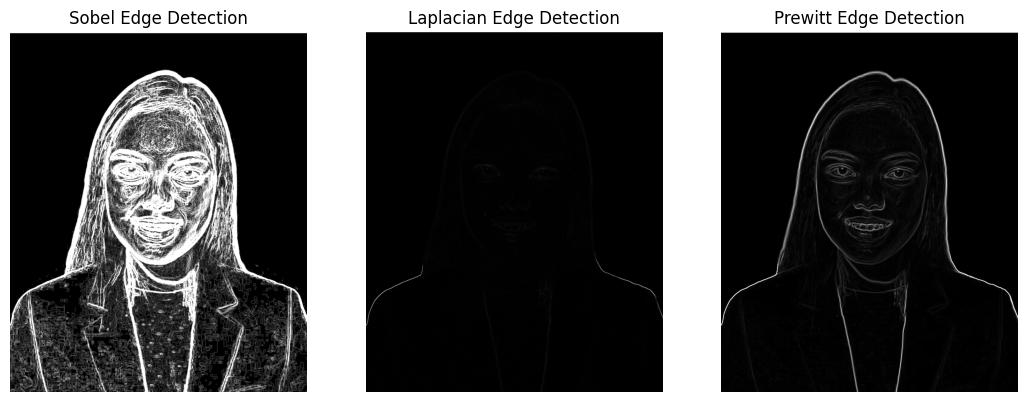

In [ ]:
# Sobel Edge Detection
def sobel_edge_detection(image):
  # Convert to grayscale
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  # Sobel edge detection in the x direction
  sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
  # Sobel edge detection in the y direction
  sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)
  # Combine the two gradients
  sobel_combined = cv2.magnitude(sobelx, sobely)
  # Convert to 8-bit for display
  sobel_combined = cv2.convertScaleAbs(sobel_combined)
  return sobel_combined
# Apply Sobel edge detection to the uploaded image
sobel_edges = sobel_edge_detection(image)


# Laplacian Edge Detection
def laplacian_edge_detection(img):
  # Convert to grayscale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # Apply Laplacian operator
  laplacian = cv2.Laplacian(gray, cv2.CV_64F)
  # Convert to 8-bit for display
  laplacian = cv2.convertScaleAbs(laplacian)
  return laplacian
  # Apply Laplacian edge detection to the uploaded image
laplacian_edges = laplacian_edge_detection(image)


# Prewitt Edge Detection
def prewitt_edge_detection(img):
  # Convert to grayscale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # Prewitt operator kernels for x and y directions
  kernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]], dtype=int)
  kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=int)
  # Applying the Prewitt operator
  prewittx = cv2.filter2D(gray, cv2.CV_64F, kernelx)
  prewitty = cv2.filter2D(gray, cv2.CV_64F, kernely)
  # Combine the x and y gradients by converting to floating point
  prewitt_combined = cv2.magnitude(prewittx, prewitty)
  # Convert to 8-bit for display
  prewitt_combined = cv2.convertScaleAbs(prewitt_combined)
  return prewitt_combined
# Apply Prewitt edge detection to the uploaded image
prewitt_edges = prewitt_edge_detection(image)


# Display the results for comparison
plt.figure(figsize=(13, 5))

plt.subplot(1, 3, 1)
plt.imshow(sobel_edges, cmap='gray')
plt.title("Sobel Edge Detection")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(laplacian_edges, cmap='gray')
plt.title("Laplacian Edge Detection")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(prewitt_edges, cmap='gray')
plt.title("Prewitt Edge Detection")
plt.axis('off')

plt.show()

**Exercise 4: Basic Image Processor (Interactive)**

Enter action (Scale, Rotate, Gaussian, Median, Bilateral, Canny, Sobel, Laplacian, Prewitt, Box, Motion, Unsharp): Sobel


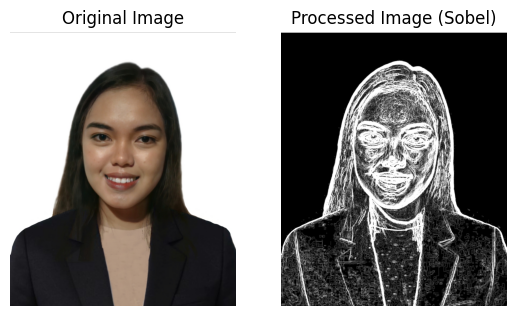

In [ ]:
def process_image(image, action):
  if action == 'Scale':
    return scale_image(image, 0.5)
  elif action == 'Rotate':
    return rotate_image(image, 45)
  elif action == 'Gaussian':
    return cv2.GaussianBlur(image, (25, 25), 0)
  elif action == 'Median':
    return cv2.medianBlur(image, 25)
  elif action == 'Bilateral':
    return cv2.bilateralFilter(image, 50, 100, 150)
  elif action == 'Canny':
    return cv2.Canny(image, 50, 100)
  elif action == 'Sobel':
    return sobel_edge_detection(image)
  elif action == 'Laplacian':
    return laplacian_edge_detection(image)
  elif action == 'Prewitt':
    return prewitt_edge_detection(image)
  elif action == 'Box':
    return box_blur(image)
  elif action == 'Motion':
    return motion_blur(image)
  elif action == 'Unsharp':
    return unsharp_mask(image)
  else:
    return image

action = input("Enter action (Scale, Rotate, Gaussian, Median, Bilateral, Canny, Sobel, Laplacian, Prewitt, Box, Motion, Unsharp): ")
processed_image = process_image(image, action)
display_images(image, processed_image, "Original Image", f"Processed Image ({action})")


**COMPARISON OF ALL PROCESSED IMAGE**

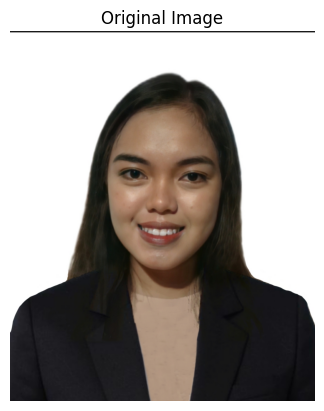

In [ ]:
# Display the Original Image
display_image(image, "Original Image")

**Blurring Techniques**

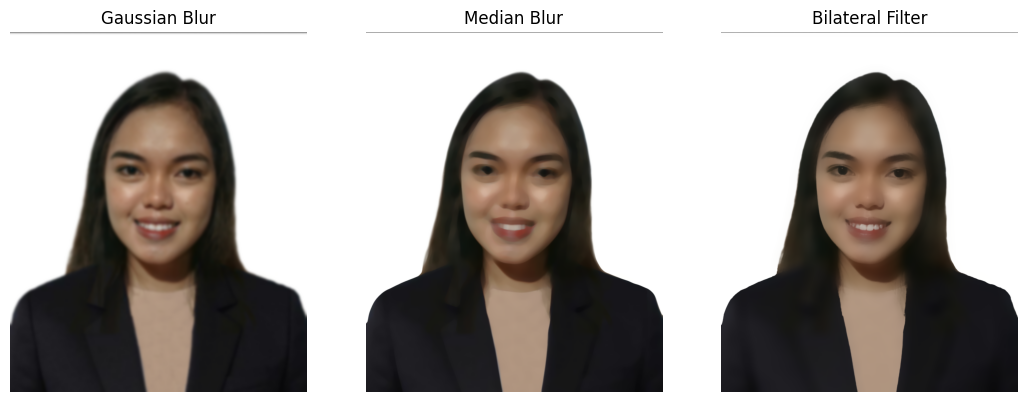

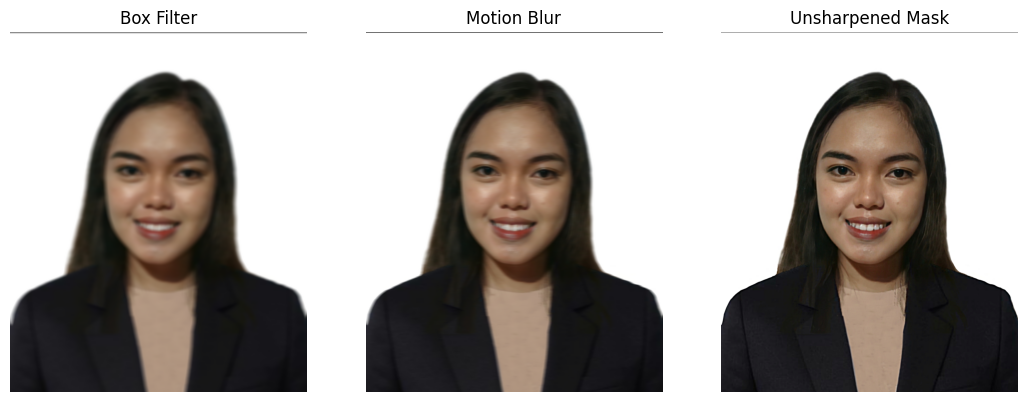

In [ ]:
# Display the Blurring Techniques results for comparison
plt.figure(figsize=(13,5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2RGB))
plt.title("Gaussian Blur")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(median_blur, cv2.COLOR_BGR2RGB))
plt.title("Median Blur")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(bilateral_filter, cv2.COLOR_BGR2RGB))
plt.title("Bilateral Filter")
plt.axis('off')

plt.figure(figsize=(13, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(box_blurred, cv2.COLOR_BGR2RGB))
plt.title("Box Filter")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(motion_blurred, cv2.COLOR_BGR2RGB))
plt.title("Motion Blur")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))
plt.title("Unsharpened Mask")
plt.axis('off')

plt.show()

**Edge Detection Compilation**

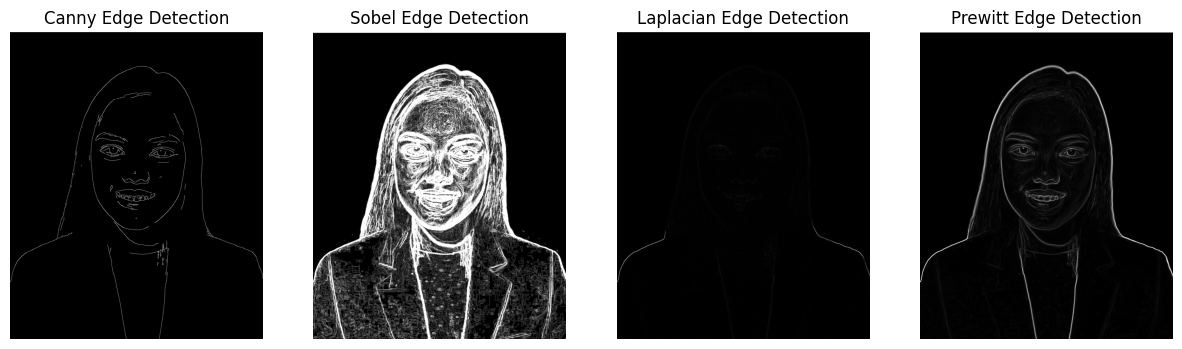

In [ ]:
# Display the Edge Detection results for comparison
plt.figure(figsize=(15, 10))
plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))
plt.title("Canny Edge Detection")
plt.axis('off')
plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(sobel_edges, cv2.COLOR_BGR2RGB))
plt.title("Sobel Edge Detection")
plt.axis('off')
plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(laplacian_edges, cv2.COLOR_BGR2RGB))
plt.title("Laplacian Edge Detection")
plt.axis('off')
plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(prewitt_edges, cv2.COLOR_BGR2RGB))
plt.title("Prewitt Edge Detection")
plt.axis('off')
plt.show()